## CA 2 - Review of Agriculture in Ireland

### Machine Learning

### API for organic food ..

reference - https://agridata.ec.europa.eu/extensions/DataPortal/API_Documentation.html

https://agridata.ec.europa.eu/extensions/DataPortal/API_Documentation.html

###### Info Page
https://agridata.ec.europa.eu/Qlik_Downloads/Organic-Production-sources.htm


###### JSON and APIs with Python - 
https://towardsdatascience.com/json-and-apis-with-python-fba329ef6ef0


In [1]:
# libraries for graphics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# create tables
from tabulate import tabulate

#graphics for calculations
import numpy as np
import pandas as pd

#Libraries to work with json files
import requests
import json

## Task 1 - Sentiment Analysis

Sentiment analysis was created using an API weblink to the Agridata webportal of the European Union.  The link is a live connection with updates replicated to the notebook as they are shared on the dashboard.

In [2]:
# setting up the HTTP request
# create a live api link to the Europa AgriFood Dashboard for live Raw Milk price updates

raw_milk_api = requests.get('https://ec.europa.eu/agrifood/api/rawMilk/prices?products=raw%20milk')

#egg_price_api = requests.get('https://ec.europa.eu/agrifood/api/poultry/egg/prices?farmingMethods=Barn,Cage')

In [4]:
# check the json data to make sure it's loaded in

#raw_milk_api.json()

In [5]:
# check data was loaded in successfully

raw_milk_api

<Response [200]>

In [6]:
# convert api json data into a dataframe for processing

df_milk_prices = pd.DataFrame.from_dict(raw_milk_api.json())

In [7]:
# show the dataframe

df_milk_prices.head()

,memberStateCode,memberStateName,beginDate,endDate,month,monthName,price,unit,year,product
0,AT,Austria,01/12/2022,31/12/2022,12,Dec,€59.20,100KG,2022,Raw milk
1,BG,Bulgaria,01/12/2022,31/12/2022,12,Dec,€51.51,100KG,2022,Raw milk
2,CY,Cyprus,01/12/2022,31/12/2022,12,Dec,€64.42,100KG,2022,Raw milk
3,CZ,Czechia,01/12/2022,31/12/2022,12,Dec,€51.69,100KG,2022,Raw milk
4,DK,Denmark,01/12/2022,31/12/2022,12,Dec,€61.45,100KG,2022,Raw milk


In [8]:
# remove the '€' from each row in the 'price' column

df_milk_prices['price'] = df_milk_prices['price'].str[1:]


In [11]:
# map all values in the 'unit' column as 100.  
# Prices are calcuated at 100kg

df_milk_prices['unit'] = df_milk_prices['unit'].replace('100KG', 100)

df_milk_prices.head()

,memberStateCode,memberStateName,beginDate,endDate,month,monthName,price,unit,year,product
0,AT,Austria,01/12/2022,31/12/2022,12,Dec,59.20,100,2022,Raw milk
1,BG,Bulgaria,01/12/2022,31/12/2022,12,Dec,51.51,100,2022,Raw milk
2,CY,Cyprus,01/12/2022,31/12/2022,12,Dec,64.42,100,2022,Raw milk
3,CZ,Czechia,01/12/2022,31/12/2022,12,Dec,51.69,100,2022,Raw milk
4,DK,Denmark,01/12/2022,31/12/2022,12,Dec,61.45,100,2022,Raw milk


In [33]:
# count unique 'memberStateName' values, grouped by year

#df_milk_prices.groupby('memberStateName')['year'].nunique()

In [35]:
# replace values to numeric

values_to_be_replaced = {
    'Austria':1,
    'Belgium':2,
    'Bulgaria':3,
    'Croatia':4,
    'Cyprus':5,
    'Czechia':6,
    'Denmark':7,
    'Estonia':8,
    'European Union':9,
    'European Union + UK':10,
    'Finland':11,
    'France':12,
    'Germany':13,
    'Greece':14,
    'Hungary':15,
    'Ireland':16,
    'Italy':17,
    'Latvia':18,
    'Lithuania':19,
    'Luxembourg':20,
    'Malta':21,
    'Netherlands':22,
    'Poland':23,
    'Portugal':24,
    'Romania':25,
    'Slovakia':26,
    'Slovenia':27,
    'Spain':28,
    'Sweden':29,
    'UK up to 01/02/2020':30,
     }

In [36]:
# add a new column based on the code in 'agriprod' column

df_milk_prices['memberStateName'] = df_milk_prices['memberStateName'].map(values_to_be_replaced)

df_milk_prices

,memberStateCode,memberStateName,beginDate,endDate,month,monthName,price,unit,year,product
0,AT,1,01/12/2022,31/12/2022,12,Dec,59.20,100,2022,Raw milk
1,BG,3,01/12/2022,31/12/2022,12,Dec,51.51,100,2022,Raw milk
2,CY,5,01/12/2022,31/12/2022,12,Dec,64.42,100,2022,Raw milk
3,CZ,6,01/12/2022,31/12/2022,12,Dec,51.69,100,2022,Raw milk
4,DK,7,01/12/2022,31/12/2022,12,Dec,61.45,100,2022,Raw milk
...,...,...,...,...,...,...,...,...,...,...
6786,EU+UK,10,01/03/1977,31/03/1977,3,Mar,18.08,100,1977,Raw milk
6787,EU-UK,9,01/02/1977,28/02/1977,2,Feb,19.05,100,1977,Raw milk
6788,EU+UK,10,01/02/1977,28/02/1977,2,Feb,18.36,100,1977,Raw milk
6789,EU-UK,9,01/01/1977,31/01/1977,1,Jan,19.25,100,1977,Raw milk


Text(0.5, 1.0, 'Histogram - data of milk prices against year')

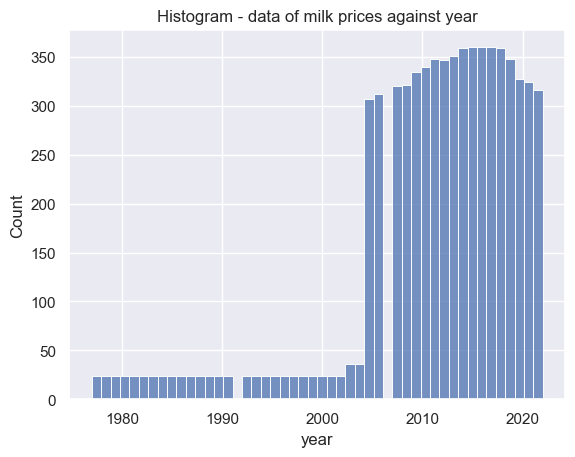

In [12]:
# Print a graphical view of the milk prices data frame 

sns.histplot(data=df_milk_prices, x="year")
plt.title("Histogram - data of milk prices against year")

#### Creat a new dataframe only displaying data from 2012 onwards


In [37]:
# filter on the data so only data after and including 2012 is used
# this mirrors the dataframe for EDA / Stats and Machine Learning

yr_2012_plus = df_milk_prices[df_milk_prices['year'] >= 2012]

yr_2012_plus.head()

,memberStateCode,memberStateName,beginDate,endDate,month,monthName,price,unit,year,product
0,AT,1,01/12/2022,31/12/2022,12,Dec,59.20,100,2022,Raw milk
1,BG,3,01/12/2022,31/12/2022,12,Dec,51.51,100,2022,Raw milk
2,CY,5,01/12/2022,31/12/2022,12,Dec,64.42,100,2022,Raw milk
3,CZ,6,01/12/2022,31/12/2022,12,Dec,51.69,100,2022,Raw milk
4,DK,7,01/12/2022,31/12/2022,12,Dec,61.45,100,2022,Raw milk


In [42]:
# remove colunmns

yr_2012_plus.drop(['monthName','memberStateCode', 'beginDate', 'endDate', 'monthName', 'product'], axis = 1, inplace=True)

#yr_2012_plus.info()

In [43]:
# check for na's and drop accordingly

yr_2012_plus = yr_2012_plus.dropna()

In [44]:
# ensure a the datatypes are appropriate

#yr_2012_plus['price'] = yr_2012_plus.price.astype(float)

#yr_2012_plus['price'] = yr_2012_plus.price.convert_objects(convert_numeric=True)


yr_2012_plus['price'] = pd.to_numeric(yr_2012_plus['price'], errors = 'coerce')

In [45]:
yr_2012_plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3812 entries, 0 to 3811
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   memberStateName  3812 non-null   int64  
 1   month            3812 non-null   int64  
 2   price            3812 non-null   float64
 3   unit             3812 non-null   int64  
 4   year             3812 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 178.7 KB


Text(0.5, 1.0, 'Plot of milk prices from 2012 by year')

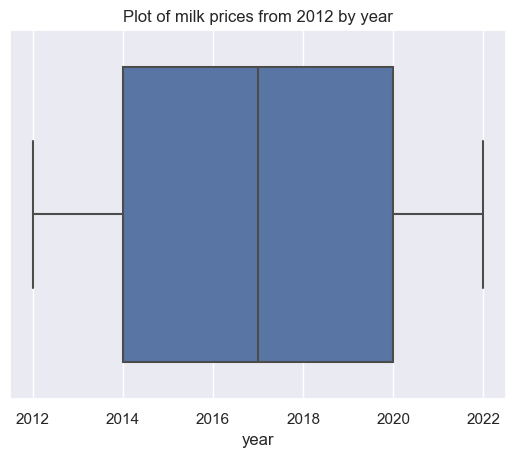

In [46]:
# view a graphical represenation of the price 

sns.boxplot(data=yr_2012_plus, x='year')
plt.title("Plot of milk prices from 2012 by year")

## Task 2 - Supervised Learning


In [60]:
# anamoly detection
from imblearn.over_sampling import SMOTE 


# sklearn libraries to complete the analysis
import sklearn as sk
import sklearn.linear_model as lm
import sklearn.neighbors as nei
import sklearn.model_selection as mod

# models and classifiers for Supervised Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from imblearn.under_sampling import NearMiss

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# libraries for the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

### Model 1 - Logistic Regression

Log

In [48]:
# assign values for x and y from the start to the end of the df
X = yr_2012_plus.iloc[:, :-1].values
y = yr_2012_plus.iloc[:, -1].values

# spliting the dataframe into Test and Train data for Algorithm 1
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# spliting the dataframe into Test and Train data for Algorigthm 2
X_Train2, X_Test2, y_Train2, y_Test2 = train_test_split(X, y, test_size = 0.2, random_state = 0)

# spliting the dataframe into Test and Train data for Algortihm 3
X_Train3, X_Test3, y_Train3, y_Test3 = train_test_split(X, y, test_size = 0.2, random_state = 0)

# spliting the dataframe into Test and Train data for Algortihm 4
X_Train4, X_Test4, y_Train4, y_Test4 = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
# creating a new classifer using logisticegression

logreg_clf = LogisticRegression()

In [50]:
# training the classifier
# X_Train and y_Train values are created in the above cells

logreg_clf.fit(X_Train, y_Train)

LogisticRegression()

In [51]:
# Predicting the result based on the test data

y_pred = logreg_clf.predict(X_Test)

In [52]:
# CONFUSION MATRIX ......to check the accuracy of the classification

y_pred_train = logreg_clf.predict(X_Train)

#print(y_pred_train)

In [53]:
# training the confusion matrix, based on predicted data and training data

cm_Train = confusion_matrix(y_pred_train, y_Train)

#print(cm_Train)

In [55]:
# testing the confusion matrix results, based on predicted and test data

cm_Test = confusion_matrix(y_pred, y_Test)

#print(cm_Test)

In [57]:
# print the Accuracy value of for test data 

logR_train = (cm_Train[0][0] + cm_Train[1][1])/len(y_Train)

print('Accuracy for training set for Logistic Regression = {:.2%}'.format(logR_train))

Accuracy for training set for Logistic Regression = 0.89%


In [58]:
# print the Accuracy value of for test data 

logR_test = ((cm_Test[0][0] + cm_Test[1][1])/len(y_Test))

print('Accuracy for test set for Logistic Regression = {:.2%}'.format(logR_test))

Accuracy for test set for Logistic Regression = 0.26%


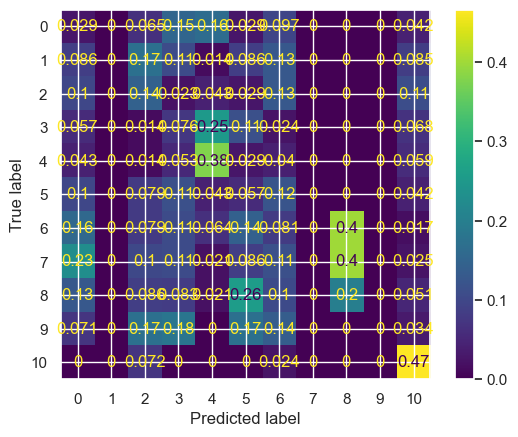

In [61]:
# display a plot  of the confusion matrix 
# the normalise field allows the results to be shown as a ratio of predicted / true or all values

cm = confusion_matrix(y_Test, y_pred, normalize='pred')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Task 3 - Machine Learning comparision table

#### REFERENCE - https://medium.com/towards-data-science/how-to-easily-create-tables-in-python-2eaea447d8fd

In [ ]:
table = [['Machine Learning Algorithm', 'Test Result', 'Train Result'], 
         ['1 - TBC', 'TBC', 'TBC'], 
         ['2 - TBC', 'TBC', 'TBC'], 
         ['3 - TBC', 'TBC', 'TBC']
        ]

In [ ]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))